# Potential Talents

As a talent sourcing and management company, we are interested in finding talented individuals for sourcing these candidates to technology companies. Finding talented candidates is not easy, for several reasons. The first reason is one needs to understand what the role is very well to fill in that spot, this requires understanding the client’s needs and what they are looking for in a potential candidate. The second reason is one needs to understand what makes a candidate shine for the role we are in search for. Third, where to find talented individuals is another challenge.

The nature of our job requires a lot of human labor and is full of manual operations. Towards automating this process we want to build a better approach that could save us time and finally help us spot potential candidates that could fit the roles we are in search for. Moreover, going beyond that for a specific role we want to fill in we are interested in developing a machine learning powered pipeline that could spot talented individuals, and rank them based on their fitness.

We are right now semi-automatically sourcing a few candidates, therefore the sourcing part is not a concern at this time but we expect to first determine best matching candidates based on how fit these candidates are for a given role. We generally make these searches based on some keywords such as “full-stack software engineer”, “engineering manager” or “aspiring human resources” based on the role we are trying to fill in. These keywords might change, and you can expect that specific keywords will be provided to you.

Assuming that we were able to list and rank fitting candidates, we then employ a review procedure, as each candidate needs to be reviewed and then determined how good a fit they are through manual inspection. This procedure is done manually and at the end of this manual review, we might choose not the first fitting candidate in the list but maybe the 7th candidate in the list. If that happens, we are interested in being able to re-rank the previous list based on this information. This supervisory signal is going to be supplied by starring the 7th candidate in the list. Starring one candidate actually sets this candidate as an ideal candidate for the given role. Then, we expect the list to be re-ranked each time a candidate is starred.

Import neccessary library.

In [1]:
import random
import numpy as np
import pandas as pd
import en_core_web_sm
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

## Data Description

The data comes from our sourcing efforts. We removed any field that could directly reveal personal details and gave a unique identifier for each candidate.

Attributes:
- id : unique identifier for candidate (numeric)

- job_title : job title for candidate (text)

- location : geographical location for candidate (text)

- connections: number of connections candidate has, 500+ means over 500 (text)

Output (desired target):
- fit - how fit the candidate is for the role? (numeric, probability between 0-1)

Keywords: “Aspiring human resources” or “seeking human resources”

In [2]:
df = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')

In [3]:
df.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [4]:
keywords = ['Aspiring human resources', 'seeking human resources']

In [5]:
nlp = en_core_web_sm.load()

In [6]:
embeddings = [nlp(sentence).vector for sentence in keywords]
docs = [nlp(x).vector for x in df.job_title]

In [7]:
cosine_sim=np.mean(cosine_similarity(embeddings, docs).T, axis=1)
cosine_sim

array([0.370267  , 0.39646822, 0.5847049 , 0.42293704, 0.2962615 ,
       0.58775413, 0.37978166, 0.43470338, 0.37978166, 0.48459607,
       0.37061238, 0.16262108, 0.362117  , 0.370267  , 0.370267  ,
       0.39646822, 0.5847049 , 0.42293704, 0.370267  , 0.39646822,
       0.5847049 , 0.42293704, 0.2962615 , 0.58775413, 0.37978166,
       0.43470338, 0.59832984, 0.6022657 , 0.59832984, 0.6022657 ,
       0.370267  , 0.39646822, 0.5847049 , 0.42293704, 0.2962615 ,
       0.58775413, 0.37978166, 0.43470338, 0.37978166, 0.48459607,
       0.37061238, 0.16262108, 0.362117  , 0.370267  , 0.39646822,
       0.5847049 , 0.42293704, 0.2962615 , 0.58775413, 0.37978166,
       0.43470338, 0.37978166, 0.48459607, 0.37061238, 0.16262108,
       0.362117  , 0.370267  , 0.5847049 , 0.42293704, 0.58775413,
       0.43470338, 0.48459607, 0.37061238, 0.16262108, 0.362117  ,
       0.4848822 , 0.432783  , 0.41871324, 0.3229584 , 0.41071856,
       0.34672314, 0.43155423, 0.57911146, 0.41167808, 0.21668

In [8]:
df['score']=cosine_sim

In [9]:
df.head()

,id,job_title,location,connection,fit,score
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.370267
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.396468
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.584705
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.422937
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.296261


In [10]:
df.sort_values(['score', 'connection'], ascending=False)

,id,job_title,location,connection,fit,score
75,76,Aspiring Human Resources Professional | Passio...,"New York, New York",212,NaN,0.614025
27,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,NaN,0.602266
29,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,NaN,0.602266
26,27,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,NaN,0.598330
28,29,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,NaN,0.598330
...,...,...,...,...,...,...
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621
41,42,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621
54,55,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621
63,64,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621


In [11]:
df.sort_values('score', ascending=False)

,id,job_title,location,connection,fit,score
75,76,Aspiring Human Resources Professional | Passio...,"New York, New York",212,NaN,0.614025
27,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,NaN,0.602266
29,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,NaN,0.602266
28,29,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,NaN,0.598330
26,27,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,NaN,0.598330
...,...,...,...,...,...,...
54,55,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621
41,42,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621
63,64,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.162621


## Term Frequency - Inverse Document Frequency (TF-IDF)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorize = TfidfVectorizer()
docs_tf = vectorize.fit_transform(df.job_title)
query_tf = vectorize.transform(keywords)

In [14]:
cosine_ftidf=np.mean(cosine_similarity(docs_tf, query_tf), axis=1)
cosine_ftidf

array([0.19007637, 0.        , 0.53989151, 0.        , 0.        ,
       0.49840171, 0.2870065 , 0.        , 0.2870065 , 0.33372074,
       0.        , 0.        , 0.17343444, 0.19007637, 0.19007637,
       0.        , 0.53989151, 0.        , 0.19007637, 0.        ,
       0.53989151, 0.        , 0.        , 0.49840171, 0.2870065 ,
       0.        , 0.38821167, 0.47637486, 0.38821167, 0.47637486,
       0.19007637, 0.        , 0.53989151, 0.        , 0.        ,
       0.49840171, 0.2870065 , 0.        , 0.2870065 , 0.33372074,
       0.        , 0.        , 0.17343444, 0.19007637, 0.        ,
       0.53989151, 0.        , 0.        , 0.49840171, 0.2870065 ,
       0.        , 0.2870065 , 0.33372074, 0.        , 0.        ,
       0.17343444, 0.19007637, 0.53989151, 0.        , 0.49840171,
       0.        , 0.33372074, 0.        , 0.        , 0.17343444,
       0.24069127, 0.1808673 , 0.21976477, 0.12801955, 0.18140343,
       0.17575974, 0.25778149, 0.55340269, 0.42123474, 0.16987

In [15]:
df['ftidf_score']=cosine_ftidf

In [16]:
df.head()

,id,job_title,location,connection,fit,score,ftidf_score
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.370267,0.190076
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.396468,0.000000
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.584705,0.539892
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.422937,0.000000
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.296261,0.000000


In [17]:
df.sort_values(['ftidf_score', 'connection'], ascending=False)

,id,job_title,location,connection,fit,score,ftidf_score
72,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,NaN,0.579111,0.553403
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,NaN,0.584705,0.539892
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.584705,0.539892
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.584705,0.539892
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.584705,0.539892
...,...,...,...,...,...,...,...
40,41,Student at Chapman University,"Lake Forest, California",2,NaN,0.370612,0.000000
53,54,Student at Chapman University,"Lake Forest, California",2,NaN,0.370612,0.000000
62,63,Student at Chapman University,"Lake Forest, California",2,NaN,0.370612,0.000000
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,NaN,0.225164,0.000000


## RankNet

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, activations, losses, Model, Input
from tensorflow.nn import leaky_relu
from itertools import combinations
from tensorflow.keras.utils import plot_model, Progbar

In [19]:
class RankNet(Model):
    def __init__(self):
        super().__init__()
        self.dense = [layers.Dense(16, activation=leaky_relu), layers.Dense(8, activation=leaky_relu)]
        self.o = layers.Dense(1, activation='linear')
        self.oi_minus_oj = layers.Subtract()
    
    def call(self, inputs):
        xi, xj = inputs
        densei = self.dense[0](xi)
        densej = self.dense[0](xj)
        for dense in self.dense[1:]:
            densei = dense(densei)
            densej = dense(densej)
        oi = self.o(densei)
        oj= self.o(densej)
        oij = self.oi_minus_oj([oi, oj])
        output = layers.Activation('sigmoid')(oij)
        return output
    
    def build_graph(self):
        x = [Input(shape=(10)), Input(shape=(10))]
        return Model(inputs=x, outputs=self.call(x))

In [20]:
doc_features = docs
doc_scores = cosine_sim

# put data into pairs
xi = []
xj = []
pij = []
pair_id = []
for pair_idx in combinations(np.arange(len(cosine_sim)), 2):
    pair_id.append(pair_idx)
    i = pair_idx[0]
    j = pair_idx[1]
    xi.append(doc_features[i])
    xj.append(doc_features[j])
    
    if doc_scores[i] == doc_scores[j]:
        _pij = 0.5
    elif doc_scores[i] > doc_scores[j]:
        _pij = 1
    else: 
        _pij = 0
    pij.append(_pij)
        
xi = np.array(xi)
xj = np.array(xj)
pij = np.array(pij)

xi_train, xi_test, xj_train, xj_test, pij_train, pij_test, pair_id_train, pair_id_test = train_test_split(
    xi, xj, pij, pair_id, test_size=0.4)

In [21]:
ranknet = RankNet()
ranknet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ranknet.fit([xi_train, xj_train], pij_train, epochs=50, batch_size=1, 
                      validation_data=([xi_test, xj_test], pij_test))

Epoch 1/50
   1/3213 [..............................] - ETA: 9:25 - loss: 0.5999 - accuracy: 1.0000

2023-11-25 16:38:31.750092: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3213/3213 [==============================] - 2s 550us/step - loss: 0.1570 - accuracy: 0.9234 - val_loss: 0.1036 - val_accuracy: 0.9482
Epoch 2/50
3213/3213 [==============================] - 2s 504us/step - loss: 0.0795 - accuracy: 0.9518 - val_loss: 0.0612 - val_accuracy: 0.9617
Epoch 3/50
3213/3213 [==============================] - 2s 501us/step - loss: 0.0615 - accuracy: 0.9561 - val_loss: 0.0580 - val_accuracy: 0.9622
Epoch 4/50
3213/3213 [==============================] - 2s 502us/step - loss: 0.0574 - accuracy: 0.9570 - val_loss: 0.0765 - val_accuracy: 0.9547
Epoch 5/50
3213/3213 [==============================] - 2s 499us/step - loss: 0.0476 - accuracy: 0.9614 - val_loss: 0.0586 - val_accuracy: 0.9617
Epoch 6/50
3213/3213 [==============================] - 2s 600us/step - loss: 0.0469 - accuracy: 0.9636 - val_loss: 0.0451 - val_accuracy: 0.9664
Epoch 7/50
3213/3213 [==============================] - 2s 536us/step - loss: 0.0407 - accuracy: 0.9661 - val_loss: 0.0546 - val_accura

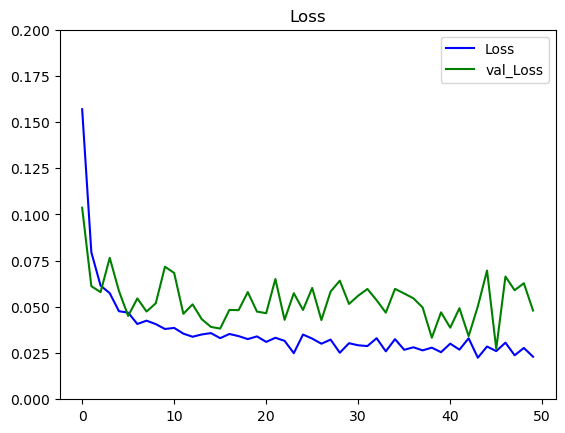

In [22]:
def plot_metrics(train_metric, val_metric=None, metric_name=None, title=None, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(train_metric,color='blue',label=metric_name)
    if val_metric is not None: plt.plot(val_metric,color='green',label='val_' + metric_name)
    plt.legend(loc="upper right")

plot_metrics(history.history['loss'], history.history['val_loss'], "Loss", "Loss", ylim=0.2)

In [23]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [24]:
history.history

{'loss': [0.15696871280670166,
  0.07952937483787537,
  0.06153295934200287,
  0.05741661414504051,
  0.047640345990657806,
  0.04689183458685875,
  0.0407300628721714,
  0.04254353046417236,
  0.04067482799291611,
  0.03803811967372894,
  0.03861996904015541,
  0.03550879657268524,
  0.033840522170066833,
  0.03507212549448013,
  0.03580494597554207,
  0.03306598216295242,
  0.035328611731529236,
  0.03418412432074547,
  0.0325559638440609,
  0.03402581438422203,
  0.031047368422150612,
  0.033277858048677444,
  0.03161755949258804,
  0.024954091757535934,
  0.03501764312386513,
  0.032835785299539566,
  0.03005805052816868,
  0.03228738158941269,
  0.025181129574775696,
  0.03033967688679695,
  0.02921389229595661,
  0.02879614196717739,
  0.03303604945540428,
  0.025955069810152054,
  0.03254563361406326,
  0.026776479557156563,
  0.02813001163303852,
  0.026467809453606606,
  0.02793022058904171,
  0.02548155002295971,
  0.030102526769042015,
  0.026851367205381393,
  0.03300499916

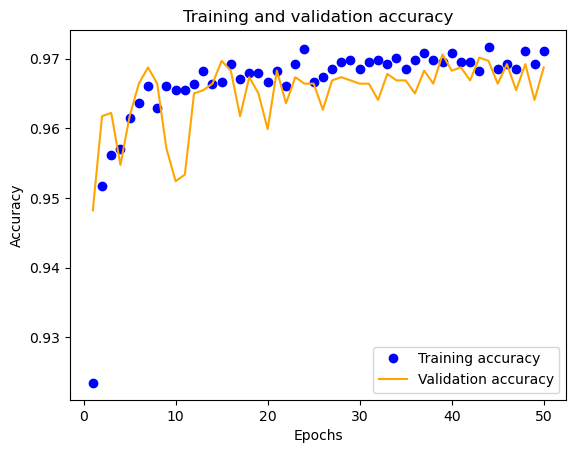

In [25]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
print('Max training accuracy: ', np.max(acc))
print('Max validation accuracy: ', np.max(val_acc))

Max training accuracy:  0.9716775417327881
Max validation accuracy:  0.9706019759178162


In [27]:
y_pred = ranknet.predict([xi_test, xj_test])

67/67 [==============================] - 0s 380us/step


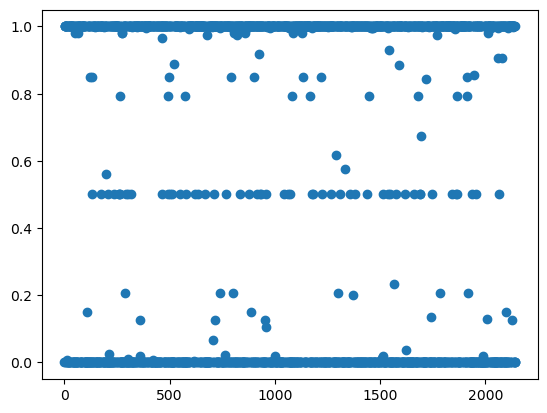

In [28]:
plt.scatter(np.arange(len(y_pred)), y_pred)